In [336]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Dataset reading and pre-processing

In [337]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

C:\Users\nandu\AppData\Local\Temp\ipykernel_53528\662064772.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset=pd.read_csv('train.csv')


taking only neccessary columns for analysis

In [338]:
train_dataset=train_dataset.iloc[:,:]
test_dataset=test_dataset.iloc[:,:]

In [339]:
train_dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [340]:
test_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [341]:
import re
def convert_to_months(experience):
    if pd.isna(experience) or not isinstance(experience, str) or experience.strip() == '':
        return np.nan
    experience = experience.strip().lower()
    years = 0
    months = 0
    
    if 'year' in experience:
        years = int(re.search(r'(\d+)\s*Years', experience,re.IGNORECASE).group(1))
    if 'month' in experience:
        months = int(re.search(r'(\d+)\s*Months', experience,re.IGNORECASE).group(1))
    
    total_months = years * 12 + months
    return total_months
train_dataset['Credit_History_Age'] = train_dataset['Credit_History_Age'].apply(convert_to_months)
test_dataset['Credit_History_Age'] = test_dataset['Credit_History_Age'].apply(convert_to_months)

In [342]:
test_dataset['Credit_History_Age']

0        273.0
1        274.0
2          NaN
3        276.0
4        327.0
         ...  
49995      NaN
49996    383.0
49997    384.0
49998    385.0
49999    386.0
Name: Credit_History_Age, Length: 50000, dtype: float64

In [343]:
train_dataset['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

creating pipeline and performing missing value imputation

In [344]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Identify continuous and categorical columns
continuous_columns = ['Monthly_Inhand_Salary',  'Num_Credit_Inquiries', 'Credit_History_Age']
categorical_columns = ['Type_of_Loan','Num_of_Delayed_Payment', 'Amount_invested_monthly','Monthly_Balance']

In [345]:
print(train_dataset[continuous_columns].dtypes)

Monthly_Inhand_Salary    float64
Num_Credit_Inquiries     float64
Credit_History_Age       float64
dtype: object


In [346]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
train_dataset[continuous_columns] = median_imputer.fit_transform(train_dataset[continuous_columns])
test_dataset[continuous_columns] = median_imputer.fit_transform(test_dataset[continuous_columns])

In [347]:
# Impute categorical columns using the most frequent value
mode_imputer = SimpleImputer(strategy='most_frequent')
train_dataset[categorical_columns] = mode_imputer.fit_transform(train_dataset[categorical_columns])
test_dataset[categorical_columns] = mode_imputer.fit_transform(test_dataset[categorical_columns])

In [348]:
#dealing with trailing underscores('_')
def remove_trailing_underscore(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1]
    return value

In [349]:
train_dataset['Age'] = train_dataset['Age'].apply(remove_trailing_underscore)
test_dataset['Age'] = test_dataset['Age'].apply(remove_trailing_underscore)


In [350]:
train_dataset['Age'] = pd.to_numeric(train_dataset['Age'])
test_dataset['Age'] = pd.to_numeric(test_dataset['Age'])

In [351]:
#dealing with unrealistic age
train_dataset.loc[train_dataset['Age'] > 120, 'Age'] = train_dataset['Age'].median()
train_dataset.loc[train_dataset['Age'] < 0, 'Age'] = train_dataset['Age'].median()

test_dataset.loc[test_dataset['Age'] > 120, 'Age'] = test_dataset['Age'].median()
test_dataset.loc[test_dataset['Age'] < 0, 'Age'] = test_dataset['Age'].median()

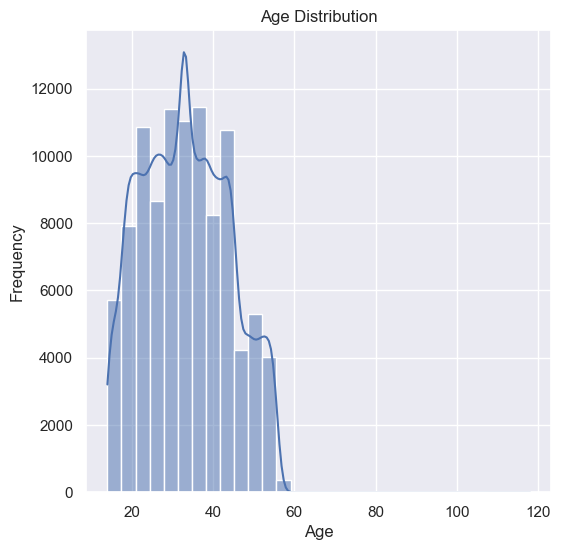

In [352]:
# distribution of age
import seaborn as sns

sns.histplot(train_dataset['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [353]:
# occupation column
train_dataset['Occupation'] = train_dataset['Occupation'].replace('_______', np.nan)
test_dataset['Occupation'] = test_dataset['Occupation'].replace('_______', np.nan)

In [354]:
train_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                            0
SSN                            0
Occupation                  7062
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [355]:
def fill_missing_occupation(df):
    # Group by SSN and find the mode of the Occupation for each group
    most_common_occupation = df.groupby('SSN')['Occupation'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    
    # Fill the missing values with the most common occupation per SSN
    df['Occupation'] = df.apply(lambda row: most_common_occupation[row['SSN']] if pd.isnull(row['Occupation']) else row['Occupation'], axis=1)
    return df

In [356]:
train_dataset = fill_missing_occupation(train_dataset)
test_dataset=fill_missing_occupation(test_dataset)

In [357]:
test_dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [358]:
occupation_count = train_dataset['Occupation'].value_counts()
occupation_count

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

Text(0.5, 0, 'Occupation')

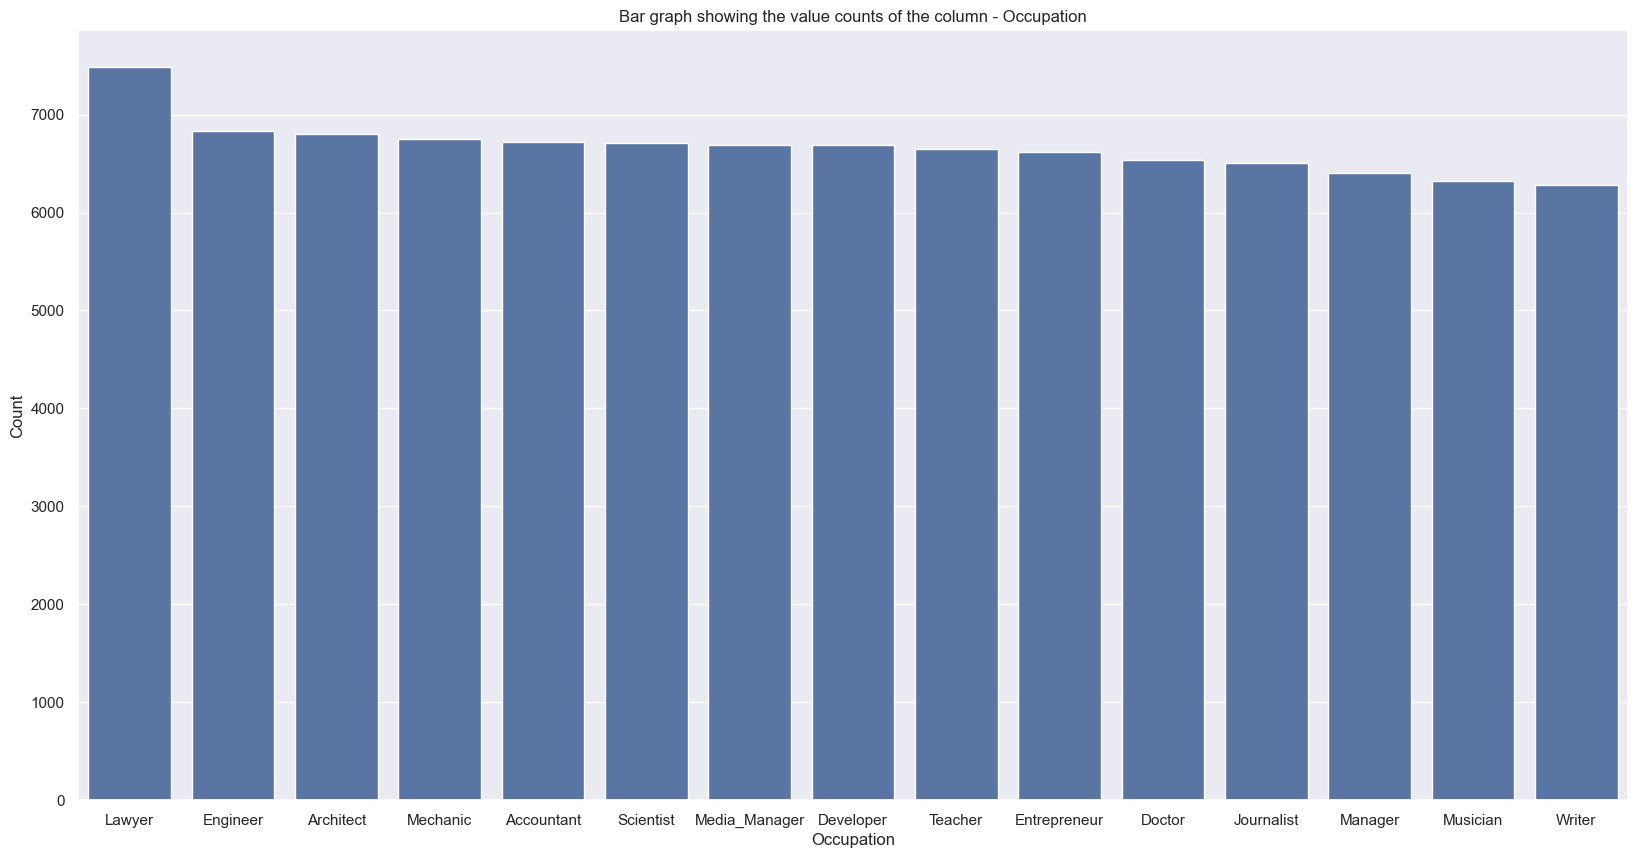

In [359]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

In [360]:
#removing '_' from annual income
train_dataset['Annual_Income'] = train_dataset['Annual_Income'].apply(remove_trailing_underscore)
test_dataset['Annual_Income'] = test_dataset['Annual_Income'].apply(remove_trailing_underscore)

In [361]:
#dealing with num_of_loans
train_dataset['Num_of_Loan'] = train_dataset['Num_of_Loan'].apply(remove_trailing_underscore)
test_dataset['Num_of_Loan'] = test_dataset['Num_of_Loan'].apply(remove_trailing_underscore)

<Axes: xlabel='Num_of_Loan'>

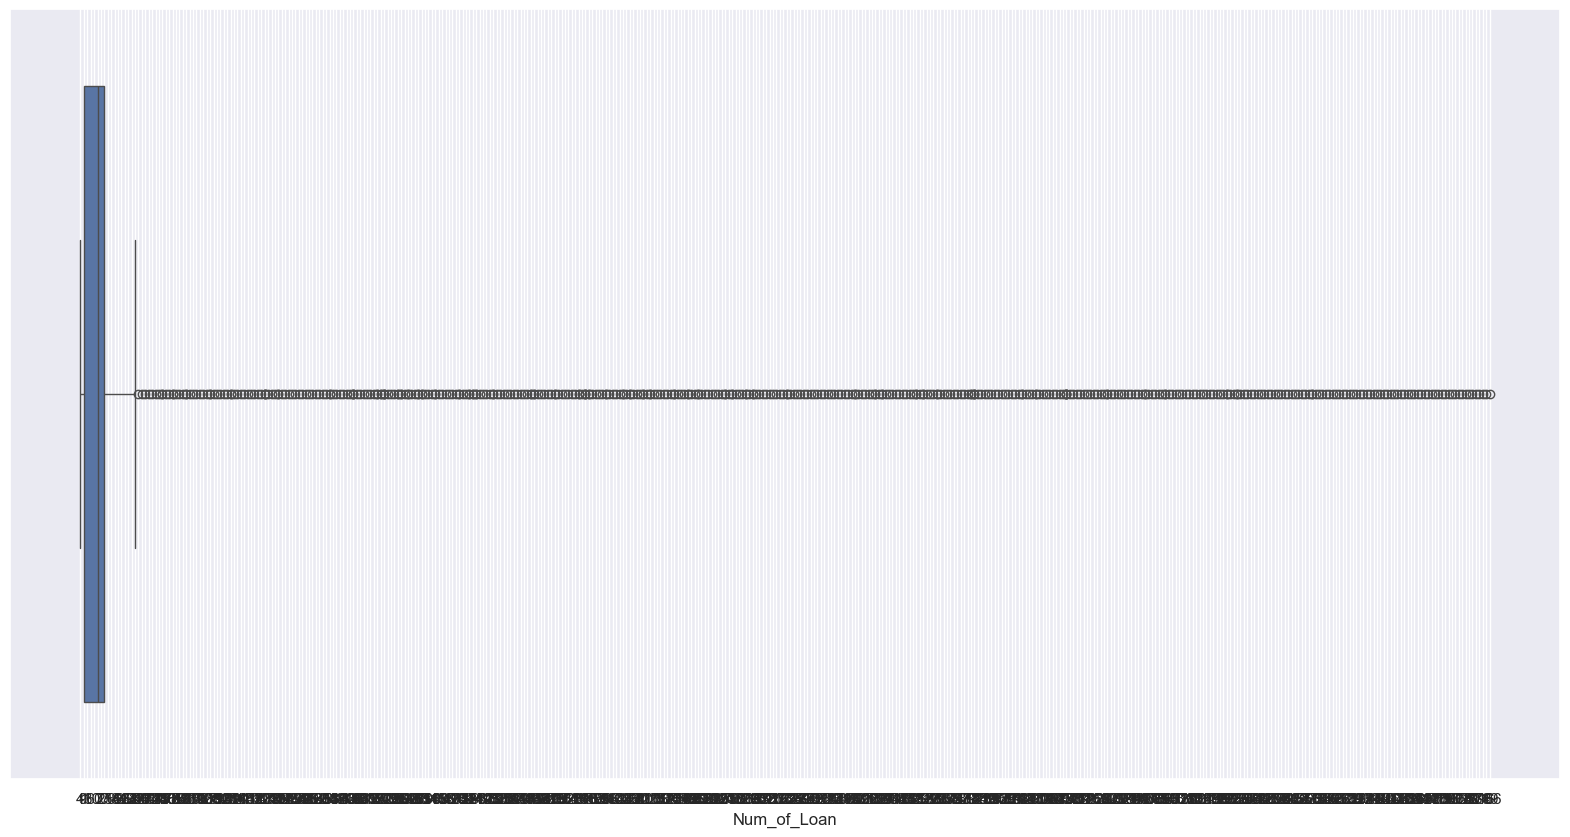

In [362]:
sns.boxplot(x = 'Num_of_Loan', data = train_dataset)


In [363]:
#delay from due date
train_dataset = train_dataset[train_dataset['Delay_from_due_date'] >= 0]
test_dataset= test_dataset[test_dataset['Delay_from_due_date'] >= 0]

In [364]:
#number of delayed payments
train_dataset['Num_of_Delayed_Payment'] = train_dataset['Num_of_Delayed_Payment'].apply(remove_trailing_underscore)
test_dataset['Num_of_Delayed_Payment'] = test_dataset['Num_of_Delayed_Payment'].apply(remove_trailing_underscore)

In [365]:
#changed credit limit
train_dataset = train_dataset[train_dataset['Changed_Credit_Limit'] != '_']
test_dataset = test_dataset[test_dataset['Changed_Credit_Limit'] != '_']

In [366]:
#Credit_Mix
train_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    35720
Good        23336
_           19678
Bad         18591
Name: count, dtype: int64

In [367]:
test_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    17971
Good        11769
_            9558
Bad          9350
Name: count, dtype: int64

In [368]:
train_dataset['Credit_Mix'] = train_dataset['Credit_Mix'].replace('_', 'Unknown')

In [369]:
test_dataset['Credit_Mix'] = test_dataset['Credit_Mix'].replace('_', 'Unknown')

In [370]:
test_dataset.Credit_Mix.value_counts()


Credit_Mix
Standard    17971
Good        11769
Unknown      9558
Bad          9350
Name: count, dtype: int64

In [371]:
credit_mix_count = train_dataset['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    35720
Good        23336
Unknown     19678
Bad         18591
Name: count, dtype: int64

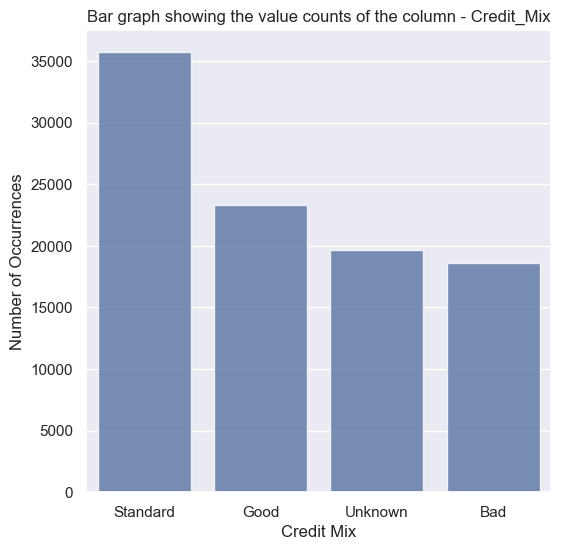

In [372]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

In [373]:
#Outstanding_Debt
train_dataset['Outstanding_Debt'] = train_dataset['Outstanding_Debt'].apply(remove_trailing_underscore)
test_dataset['Outstanding_Debt'] = test_dataset['Outstanding_Debt'].apply(remove_trailing_underscore)

In [379]:
train_dataset['Amount_invested_monthly'] = train_dataset['Amount_invested_monthly'].replace('__10000__', np.nan)




In [378]:
test_dataset['Amount_invested_monthly'] = test_dataset['Amount_invested_monthly'].replace('__10000__', np.nan)

In [380]:
train_dataset['Amount_invested_monthly'] = pd.to_numeric(train_dataset['Amount_invested_monthly'])



In [381]:
test_dataset['Amount_invested_monthly'] = pd.to_numeric(test_dataset['Amount_invested_monthly'])

In [382]:
train_dataset['Amount_invested_monthly'] = train_dataset.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

In [383]:
test_dataset['Amount_invested_monthly'] = test_dataset.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [384]:
test_dataset['Amount_invested_monthly'] = test_dataset['Amount_invested_monthly'].replace(np.nan,0)

In [385]:
test_dataset['Amount_invested_monthly'].isna().sum()

0

In [386]:
#payment behaviour
train_dataset['Payment_Behaviour'] = train_dataset['Payment_Behaviour'].replace('!@9#%8', np.nan)

test_dataset['Payment_Behaviour'] = test_dataset['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [387]:
train_dataset['Payment_Behaviour'] = train_dataset.groupby(
    'Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode()))

In [388]:
test_dataset['Payment_Behaviour'] = test_dataset.groupby(
    'Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode()))

In [389]:
test_dataset.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12366
High_spent_Medium_value_payments     8681
High_spent_Large_value_payments      6656
Low_spent_Medium_value_payments      6647
High_spent_Small_value_payments      5518
Low_spent_Large_value_payments       5096
Name: count, dtype: int64

In [390]:
credit_score_count = train_dataset['Credit_Score'].value_counts()


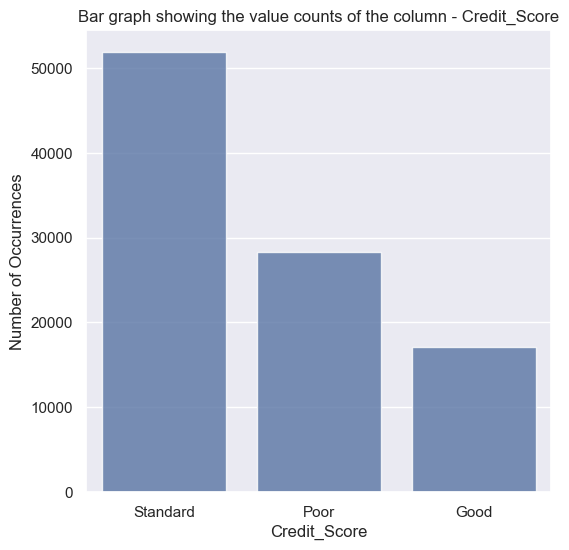

In [391]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_score_count.index, y=credit_score_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Score')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit_Score', fontsize=12)
plt.show()

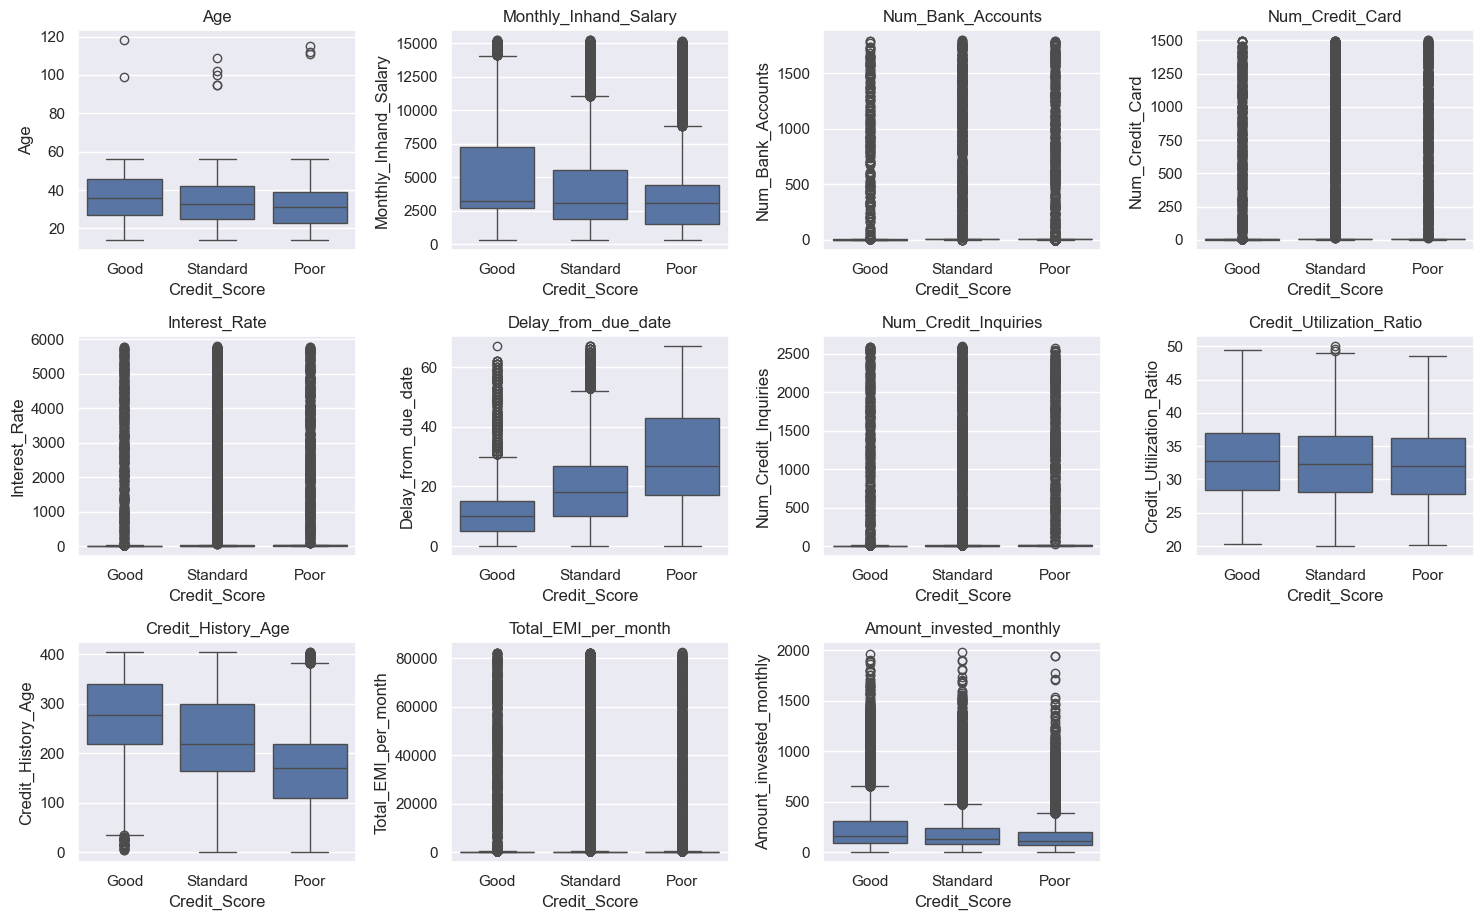

In [393]:
df_numeric_cols = [col for col in train_dataset.columns if train_dataset[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=train_dataset)
    plt.title(col)
plt.tight_layout()
plt.show()

# Encoding categorical data